# Coorbital satellites motion:
**The Orbital Dance of Epimetheus and Janus**

The idea behind this project is the verification of the horseshoe-like relative
orbit of the Janus-Epimetheus satellite pair orbiting Saturn. The project should also include an analytical
study of the motion from the existing literature. The framework is the Circular Restricted Three-Body
Problem (CR3BP)

I can take inspiration from here:
https://github.com/KevinCarr42/Saturns-Moons-Janus-and-Epimetheus


## N-body Units:
To simplified the problem we do the simulation in **N-body units**, so we fix the unit of **Mass** and the unit of **Lenght** so that we have **G=1** and then after the simulations, a posteriori, we can up-scale our results to the physical ones

$$
M_{n-body} = 1 \quad\quad R_{n-body} = 1
$$

the circular velocity becomes

$$
\frac{V^2_c}{R} = \frac{GM}{R^2} \quad \rightarrow \quad V_{c,n-body} = \sqrt{\frac{G M_{n-body}}{R_{n-body}}} = 1 
$$

and time becomes

$$
T = \sqrt{\frac{L^3}{GM}} \quad \rightarrow \quad T_{n-body} = 1 
$$

basically then we can transform in physical units as:
- $L_{phy} = L_{Nbody}L_{scale}$
- $M_{phy} = M_{Nbody}M_{scale}$
- $T_{phy} = T_{Nbody}T_{scale}$
- $V_{phy} = V_{Nbody}V_{scale}$

It's importan to set our scales: in our case $M_{scale}$ and $L_{scale}$ correspond to Saturn mass in $M_{Saturn}$ and Saturn radii
- $M_{scale} = M_{Saturn}$
- $L_{scale} = R_{Saturn}$
- $T_{scale} = \sqrt{\frac{L_{scale}^3}{G M_{scale}}}$
- $V_{scale} = \sqrt{\frac{G M_{scsle}}{R_{scsle}}}$



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from modules.moons import Moons
#from modules.Nbody_units import Nbody_units
from modules.Saturn_Nbody_units import Nbody_units

sns.set(style="whitegrid")

#%matplotlib notebook

### Initial condition
bla bla bla bla

In [2]:
# First we set the Nbody unit class in Saturn scale:
nu = Nbody_units()

"""
The Saturn class is defined with the following units:
>>> mass unit = Saturn mass
>>> distance unit = Epimetheus semi-major axis (151410 km)
>>> velocity unit = km/s
>>> time unit = years
"""

# initial conditions:
"""
Even if the class is called 'Moons', the first moon is the Saturn itself,
then the other two correspond to Janus-Epimetheus.

We take as initial condition Janus-Epimetheus in the opposite side of Saturn.
the values are taken from Spitale et. all 2006 (p.14), since their ellipticity is very small, we can assume a circular orbit and taking
'a' as the radius of the orbit.
Mass of Janus = 1.98e18 kg and Epimetheus = 5.5e17 kg are from: https://www.whitman.edu/Documents/Academics/Mathematics/sakari.pdf
"""

# Janus-Epimetheus masses in Saturn masses
m_Janus = 1.98e18 * nu.kg_to_gr / nu.Msaturn_cgs
m_Epimetheus = 5.5e17 * nu.kg_to_gr / nu.Msaturn_cgs

# mass from "formation of Janus-Epimetheus" paper Treffenstadt
#m_Janus = 0.58333e-8
#m_Epimetheus = 0.11667e-8

# Janus-Epimetheus radius in [N-body units]
a_scale = 151410 # km 
a_Janus = 151460 / a_scale       # km
a_Epimetheus = 151410 / a_scale  # km

# Janus-Epimetheus velocity [N-body units]
vel_Janus = np.sqrt(1/a_Janus) # km/s
vel_Epimetheus = np.sqrt(1/a_Epimetheus) # km/s

# Set the initial conditions
mass = np.array([1, m_Janus, m_Epimetheus]).reshape(-1)      # Saturn, Janus, Epimetheus

position = np.array([[0., 0., 0.],
                     [a_Janus, 0., 0.],            # Janus
                     [-a_Epimetheus, 0., 0.]])     # Epimetheus

velocity = np.array([[0., 0., 0.],
                    [0., vel_Janus, 0.],
                    [0., -vel_Epimetheus, 0.]])

print('N-body units:')
print('mass:', mass)
print('position:', position)
print('velocity:', velocity)

# convert the initial conditions to physical units to check the values
Physical_mass = nu.m_to_Kg(mass)
Physical_position = nu.pos_to_km(position)
Physical_velocity = nu.vel_to_physical(velocity)

print('Physical units in Nbody units:')
print('mass in kg:', Physical_mass)
print('position in km:', Physical_position)
print('velocity in km/s:', Physical_velocity)


# create the moons object
System = Moons(position=position, velocity=velocity, mass=mass)

N-body units:
mass: [1.00000000e+00 3.48407531e-09 9.67798698e-10]
position: [[ 0.          0.          0.        ]
 [ 1.00033023  0.          0.        ]
 [-1.          0.          0.        ]]
velocity: [[ 0.          0.          0.        ]
 [ 0.          0.99983493  0.        ]
 [ 0.         -1.          0.        ]]
Physical units in Nbody units:
mass in kg: [5.683e+26 1.980e+18 5.500e+17]
position in km: [[      0.       0.       0.]
 [ 151460.       0.       0.]
 [-151410.       0.       0.]]
velocity in km/s: [[  0.           0.           0.        ]
 [  0.          15.82496338   0.        ]
 [  0.         -15.82757609   0.        ]]


The radii of Saturn's rings are often measured in terms of Saturn's radius (\(R_S\)), where \(1 R_S = 60,268 \, \text{km}\). Here's the approximate range for each ring:

### Inner and Outer Radii of Saturn's Rings (in $R_S$):

- **D Ring**: 1.11 $R_S$ to 1.23 $R_S$
- **C Ring**: 1.23 $R_S$ to 1.52 $R_S$
- **B Ring**: 1.52 $R_S$ to 1.95 $R_S$
- **Cassini Division**: 1.95 $R_S$ to 2.02 $R_S$
- **A Ring**: 2.02 $R_S$ to 2.27 $R_S$
- **F Ring**: ~2.32 $R_S$ (very narrow, located just outside the A ring)
- **G Ring**: 2.8 $R_S$ to 2.9 $R_S$ (fainter and more diffuse)
- **E Ring**: 3.1 $R_S$ to 8 $R_S$ (broad and diffuse)

These ranges are approximate and based on observations, with some variability depending on specific definitions and measurements. Let me know if you'd like more details about any particular ring!

Here are the ranges of Saturn's rings in kilometers:

- **D Ring**: 66,897 km to 74,130 km
- **C Ring**: 74,130 km to 91,607 km
- **B Ring**: 91,607 km to 117,523 km
- **Cassini Division**: 117,523 km to 121,741 km
- **A Ring**: 121,741 km to 136,808 km
- **F Ring**: ~139,822 km (very narrow)
- **G Ring**: 168,750 km to 174,777 km
- **E Ring**: 186,831 km to 482,144 km

Let me know if you'd like further details!

## Predicted values

In [8]:
## Exchange period

def exchange_period(ro, ri): 
    # we are in n-body units
    return 2*np.pi*(ro*ri)**1.5 / (ro**1.5 - ri**1.5)

print(System.pos[2,0])

Predicted_swap_period = exchange_period(np.abs(System.pos[1,0]), np.abs(System.pos[2,0]))

print(f'Predicted exchange period in n-body: {Predicted_swap_period:.4f}')
print(f'Predicted exchange period in years: {nu.t_to_yr(Predicted_swap_period):.4f}')

-1.0
Predicted exchange period in n-body: 12689.7306
Predicted exchange period in years: 3.8493


Text(0, 0.5, 'y [Nbody units]')

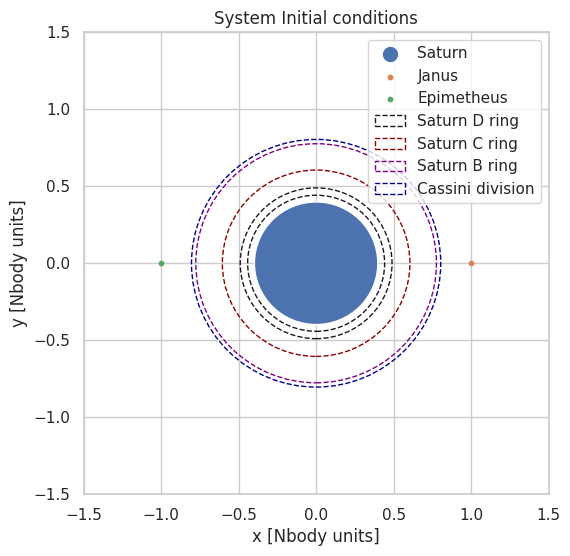

In [3]:
# check plot
fig, ax = plt.subplots(figsize=(6, 6))
Saturn = Circle((0, 0), 60268/a_scale, fill=True)
ax.scatter(System.pos[0, 0], System.pos[0, 1], s=1e2, label='Saturn')
ax.scatter(System.pos[1, 0], System.pos[1, 1], s=10, label='Janus')
ax.scatter(System.pos[2, 0], System.pos[2, 1], s=10, label='Epimetheus')
ring1 = Circle((0, 0), 66897/a_scale, fill=False, color='k', linestyle='--')
ring2 = Circle((0, 0), 74130/a_scale, fill=False, color='k', linestyle='--')
ring3 = Circle((0, 0), 91607/a_scale, fill=False, color='darkred', linestyle='--')
ring4 = Circle((0, 0), 117523/a_scale, fill=False, color='purple', linestyle='--')
ring5 = Circle((0, 0), 121741/a_scale, fill=False, color='darkblue', linestyle='--')
ring1.set_label('Saturn D ring')
ring3.set_label('Saturn C ring')
ring4.set_label('Saturn B ring')
ring5.set_label('Cassini division')
ax.add_patch(ring1)
ax.add_patch(ring2)
ax.add_patch(ring3)
ax.add_patch(ring4)
ax.add_patch(ring5)
ax.add_patch(Saturn)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
ax.legend(loc='upper right')
ax.set_title('System Initial conditions')
ax.set_xlabel('x [Nbody units]')
ax.set_ylabel('y [Nbody units]')

## Period
To estimate the period we use:

$$
P = \sqrt{\frac{4\pi^2a^3}{GM}}
$$

Since we're working in Nbody-units we can get rid of the constant $G$ ($G=1$) and $M$ is the total mass of the system., so it becomes

$$
P = 4\pi \sqrt{\frac{a^3}{M}}
$$

In [4]:
# Janus
a = np.sqrt(np.sum(System.pos[1]))
print(a)
M_tot = np.sum(System.mass)

T_orbit = 2*np.pi * np.sqrt((a**3.)/(M_tot))
print('Period of Janus in Nbody units: ',T_orbit)
print('Period of Janus in days: ',nu.t_to_days(T_orbit))

1.0001651009603616
Period of Janus in Nbody units:  6.284741397306819
Period of Janus in days:  0.6963237034299944


## Simulation

in this case we approximate the problem in newton gravity

### Collisional vs Collisionless Simulations

The importance of close particle-particle interactions allows to distinguish between collisional and collisionless systems. To do so, the starting point would be an analysis of if and how much gravitational encounters between stars are able to change the kinematic status of themselves. \
We consider a test star with velocity $v$ which crosses the potential well of another star a rest. Both stars have the same mass $m$, and $b$ is their mutual distance. After some calculation it can be seen that the velocity variation of the incoming star is $\delta v = \frac{2 G m}{b v}.$ \
Extending now this reasoning considering all the stars in the galaxy, it is easy to prove that the average velocity variation $\delta v$ is zero, but the standard deviation $\delta v^2$ is not. In particular we can find out that , being $N$ the number of stars in the system,
$$
\begin{equation}
    \frac{ \Delta v^2 }{v^2} \approx 8 \frac{1}{N} log\frac{N}{2} .
\end{equation}\tag{6}
$$
This implies that to produce a substantial change in the velocity the star needs to cross the galaxy a number of times $n_{relax}$ equal to 
$$
\begin{equation}
    n_{relax} \approx  \frac{N}{ 8 log \frac{N}{2} } ;
\end{equation}\tag{7}
$$
from here, we define $t_{cross} \approx \frac{R}{v}$ as the time required approximately from the star to cross the whole cluster, we can introduce the concept of relaxation time
$$
\begin{equation}
    t_{relax} = n_{relax} t_{cross} ,
\end{equation}\tag{8}
$$
and we substitute the previous expression in this equation
$$
\begin{equation}
    t_{relax} \approx 0.1 \frac{N}{log N } t_{cross} .
\end{equation}\tag{9}
$$
Overall, we can use these times to distinghish between collisional and collisionless systems. In particular:

1) $t_{simulation} \gtrsim t_{relax}$: _COLLISIONAL SYSTEMS_ \
In this case particle-particle interactions cannot be neglected in order to describe particles' motion: direct force extimate has to be used.
2) $t_{simulation} \ll t_{relax}$: _COLLISIONLESS SYSTEMS_ \
In this case particle-particle interactions do not have an important role, particles' trajectories can be tracked considering a smooth matter distribution: less computationally expensive tecniques are required to estimate the force.

Adding a softening parameter to the gravitational acceleration equation is common in simulations to prevent singularities and large accelerations during close encounters. For the Janus-Epimetheus system, the choice of the softening parameter depends on the physical scales of the system.


---

### **What is Softening?**
The softened gravitational force modifies the denominator in the gravitational acceleration equation to avoid divergence as $ |\mathbf{r}_i - \mathbf{r}_j| \to 0 $. The softened force is:

$$
\mathbf{a}_i = - G m_j \frac{\mathbf{r}_i - \mathbf{r}_j}{\left(|\mathbf{r}_i - \mathbf{r}_j|^2 + \epsilon^2\right)^{3/2}},
$$

where:
- $ \epsilon $: Softening length, which acts as a smoothing scale.

---

### **Choosing a Softening Length**
For the Janus-Epimetheus system, consider the following:

1. **Orbital Radius**:
   - The orbital radii of Janus and Epimetheus are around 151,500 km and 151,600 km, respectively.
   - The separation between the moons varies from ~50 km to a few hundred kilometers during close encounters.

2. **Physical Sizes**:
   - Janus' radius: ~90 km.
   - Epimetheus' radius: ~60 km.

3. **Recommended Softening Length**:
   - A typical choice for $ \epsilon $ is 1–10% of the closest approach distance or the physical radius of the bodies.
   - For Janus and Epimetheus, $ \epsilon \approx 10 \, \text{km} $ is a reasonable starting point.

---

### **Softening in N-body Units**
If you use N-body units:
1. Normalize the softening length by the characteristic distance scale (e.g., the mean orbital radius of Janus, $ r_\text{Janus} $).
2. For $ r_\text{Janus} = 1 $, set $ \epsilon $ in N-body units:
   $$
   \epsilon \approx \frac{10 \, \text{km}}{151,500 \, \text{km}} \approx 6.6 \times 10^{-5}.
   $$


In [5]:
from modules.integrators import integrator_leapfrog
from modules.dynamics import acceleration_direct, acceleration_direct_vectorized, acceleration_pyfalcon

def integration_leapfrog(system: Moons, h: float, tsimulation: float, t: float, soft: float):
    N = int((tsimulation - t) / h)  # number of time steps
    num_particles = len(system.mass)  # number of particles in the system
    path = np.empty((N, num_particles, 3))  # array to store the position of the system
    velocity = np.empty((N, num_particles, 3))  # array to store the velocity of the system
    time = np.empty(N)
    orbital_radius = np.empty((N, num_particles, 1))
    moons_distance = np.empty(N)

    print('Integrating...')
    i = 0
    while t < tsimulation - h:
        # integrate the system
        updated_system, _,  updated_acc, _, _ = integrator_leapfrog(particles=system, tstep=h,
                                                                    acceleration_estimator=acceleration_pyfalcon, softening=soft)

        # store the position and velocity of the system
        path[i] = updated_system.pos
        velocity[i] = updated_system.vel

        # calculate the orbital radius
        orbital_radius[i] = updated_system.radius()
        moons_distance[i] = updated_system.separation()

        # update the system
        t += h
        time[i] = t

        i += 1

    print('Integration finished')
    return path, velocity, time, orbital_radius, moons_distance

In [6]:
# how many orbits until swap?
orbital_period = nu.t_to_days(T_orbit) # days
swap_period = 4 * 365.25 # approx days
num_orbits = swap_period / orbital_period

# orbits before swap
print('Number of orbit until the swap: ',num_orbits)

Number of orbit until the swap:  2098.16209444446


In [7]:
# define the time of simulation and the number of steps

t0 = 0.0                            # initial time [yr]
tf = 6.0                            # final time [yr]
tsimulation = nu.t_to_Nbody(tf)     # time of simulationin years
print('Time of simulation in Nbody units: ',tsimulation)
print('Time of simulation in days: ',nu.t_to_days(tsimulation))
N = int(1e6)                        # number of steps
h = (tsimulation - t0)/N            # time steps
print('Time step in Nbody units: ',h)
print('Time step in days: ',nu.t_to_days(h))
softening = 6.6e-5

System_test = System.copy()

Time of simulation in Nbody units:  19779.609259822613
Time of simulation in days:  2191.4999999999995
Time step in Nbody units:  0.019779609259822615
Time step in days:  0.0021915


In [8]:
import os
# integrate the system using the leapfrog method
path = 'outputs/sof6_6e5__steps1e6/'

if not os.path.exists(path):

    System_orbit, System_vel, System_time, System_OrbRadius, System_separation = integration_leapfrog(system=System_test, h=h, 
                                                                                            tsimulation=tsimulation, t=t0, soft=softening)

    print(System_orbit.shape)

    # Transform into physical quantities
    Physical_orbit = nu.pos_to_physical(System_orbit)
    Physical_OrbRadius = nu.pos_to_km(System_OrbRadius)
    Physical_vel = nu.vel_to_physical(System_vel)
    Physical_time = nu.t_to_yr(System_time)

    # saving the results
    os.makedirs(path)
    np.save(path+'positions.npy', Physical_orbit)
    np.save(path+'velocity.npy', Physical_vel)
    np.save(path+'time.npy', Physical_time)
    np.save(path+'orbital_radius.npy', Physical_OrbRadius)
    np.save(path+'separation.npy', System_separation)

else:
    Physical_orbit = np.load(path+'positions.npy')
    Physical_vel = np.load(path+'velocity.npy')
    Physical_time = np.load(path+'time.npy')
    Physical_OrbRadius = np.load(path+'orbital_radius.npy')
    System_separation = np.load(path+'separation.npy')

## Result

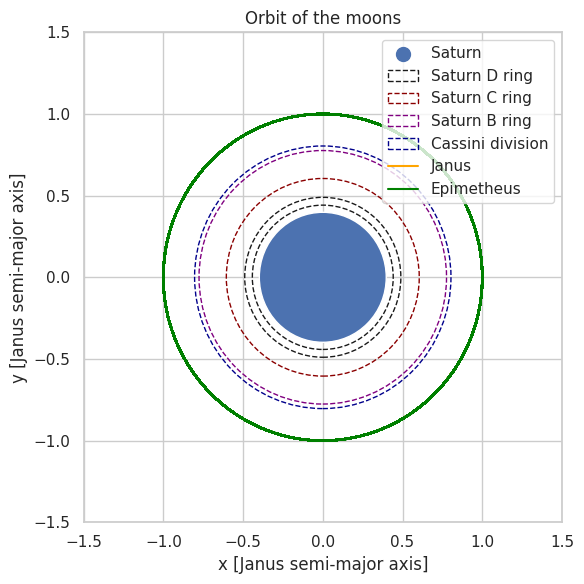

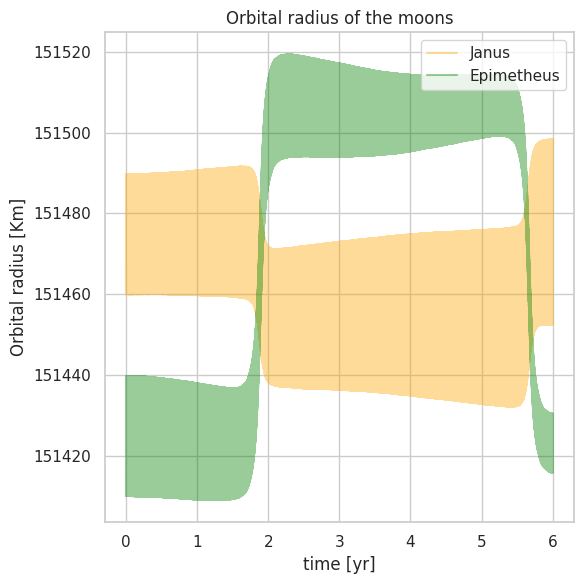

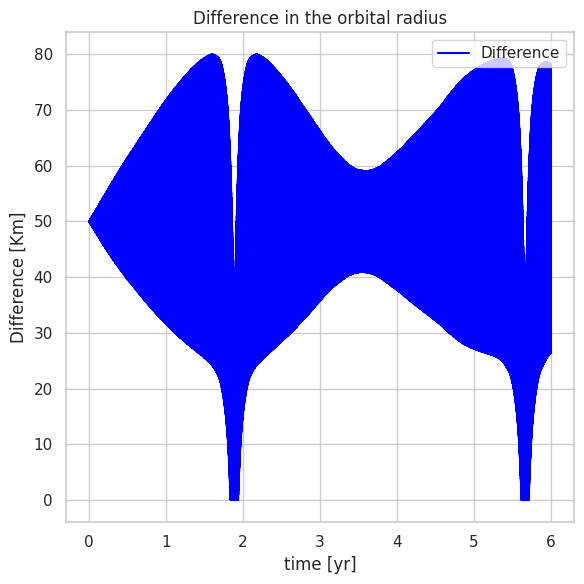

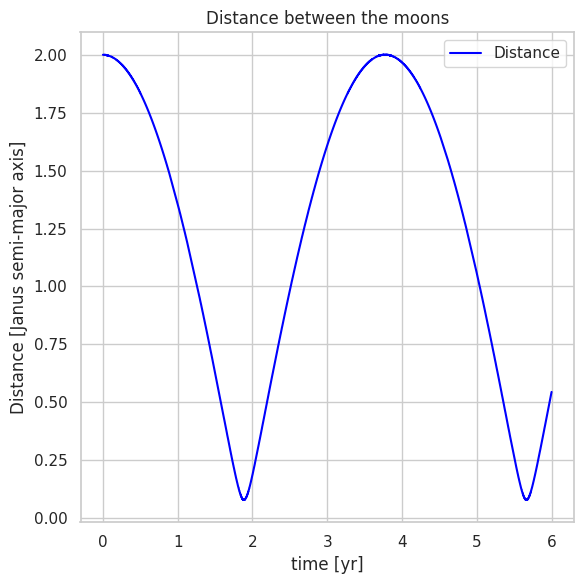

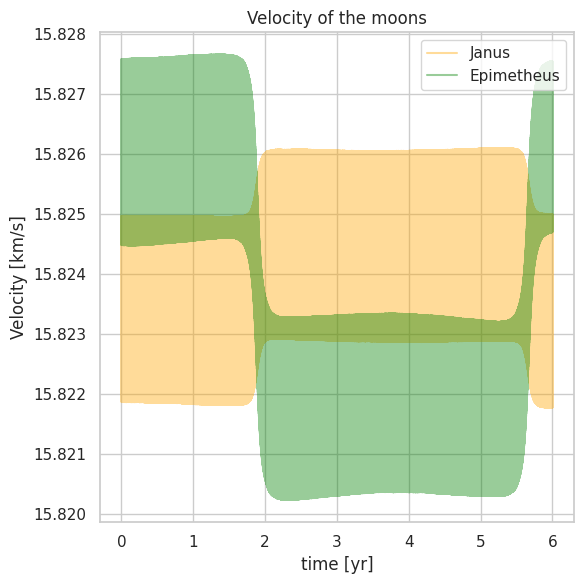

In [9]:
# PLOT THE RESULTS
plt.ion()  # Turn on interactive mode

# 1) Orbit of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
Saturn = Circle((0, 0), 60268/a_scale, fill=True)
ax.scatter(System_test.pos[0, 0], System_test.pos[0, 1], s=1e2, label='Saturn')
ring1 = Circle((0, 0), 66897/a_scale, fill=False, color='k', linestyle='--')
ring2 = Circle((0, 0), 74130/a_scale, fill=False, color='k', linestyle='--')
ring3 = Circle((0, 0), 91607/a_scale, fill=False, color='darkred', linestyle='--')
ring4 = Circle((0, 0), 117523/a_scale, fill=False, color='purple', linestyle='--')
ring5 = Circle((0, 0), 121741/a_scale, fill=False, color='darkblue', linestyle='--')
ring1.set_label('Saturn D ring')
ring3.set_label('Saturn C ring')
ring4.set_label('Saturn B ring')
ring5.set_label('Cassini division')
ax.add_patch(ring1)
ax.add_patch(ring2)
ax.add_patch(ring3)
ax.add_patch(ring4)
ax.add_patch(ring5)
ax.add_patch(Saturn)
ax.plot(Physical_orbit[:, 1, 0], Physical_orbit[:, 1, 1], c='orange', label='Janus')
ax.plot(Physical_orbit[:, 2, 0], Physical_orbit[:, 2, 1], c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbit of the moons')
ax.set_xlabel('x [Janus semi-major axis]')
ax.set_ylabel('y [Janus semi-major axis]')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
plt.tight_layout()
fig.savefig(path+'Orbit_moons.png')

# 2) Orbital radius of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, Physical_OrbRadius[:, 1], c='orange', alpha=0.4, label='Janus')
ax.plot(Physical_time, Physical_OrbRadius[:, 2], c='green', alpha=0.4, label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbital radius of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Orbital radius [Km]')
plt.tight_layout()
fig.savefig(path+'Orbital_radius_moons.png')

# 3) difference in the orbital radius:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, np.abs(Physical_OrbRadius[:, 1] - Physical_OrbRadius[:, 2]), c='blue', label='Difference')
ax.legend(loc='upper right')
ax.set_title('Difference in the orbital radius')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Difference [Km]')
plt.tight_layout()
fig.savefig(path+'Difference_orbital_radius.png')

# 4) Distance between the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, System_separation, c='blue', label='Distance')
ax.legend(loc='upper right')
ax.set_title('Distance between the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Distance [Janus semi-major axis]')
plt.tight_layout()
fig.savefig(path+'Distance_moons.png')

# 5) Velocity of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, np.linalg.norm(Physical_vel[:, 1, :], axis=-1), alpha=0.4, c='orange', label='Janus')
ax.plot(Physical_time, np.linalg.norm(Physical_vel[:, 2, :], axis=-1), alpha=0.4, c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Velocity of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Velocity [km/s]')
plt.tight_layout()
fig.savefig(path+'Velocity_moons.png')

## Taking numerical values

In [10]:
## swap interval
'''
Since it's not a perfetc curve we divide the curve in two and then we calculate the minumum of the two curves,
doing like this we can get the two minumum of the original curve.
For semplicity we use the System_separation curve.
'''
# 1) Dividing in to part the Time
half_time_indices = len(Physical_time)//2

half_sepation1 = System_separation[:half_time_indices]
minimum1 = np.min(half_sepation1)

half_sepation2 = System_separation[half_time_indices:]
minimum2 = np.min(half_sepation2)

# retrive the indices of the two minima
index1 = np.where(System_separation == minimum1)[0][0]
index2 = np.where(System_separation == minimum2)[0][0]

# 2) Find the peaks
time1 = Physical_time[index1]
time2 = Physical_time[index2]

print(f'Time of the first swap: {time1:.4f} yr')
print(f'Time of the second swap: {time2:.4f} yr')
print(f'difference: {time2-time1:.4f} yr')

# 3) Find the closest approach
closest_approach = nu.pos_to_km((minimum1+minimum2)*0.5)
error_closet_approach = nu.pos_to_km(np.abs(minimum1-minimum2)*0.5)
print(f'closest approach: {closest_approach:.4f} pm {error_closet_approach:.4f} km')


Time of the first swap: 1.8855 yr
Time of the second swap: 5.6653 yr
difference: 3.7798 yr
closest approach: 11730.6481 pm 4.9585 km


Orbital swap period in year: 0.4500 yr
Orbital swap period in days: 164.3625 days
Orbital swap period in year: 0.2300 yr
Orbital swap period in days: 84.0075 days


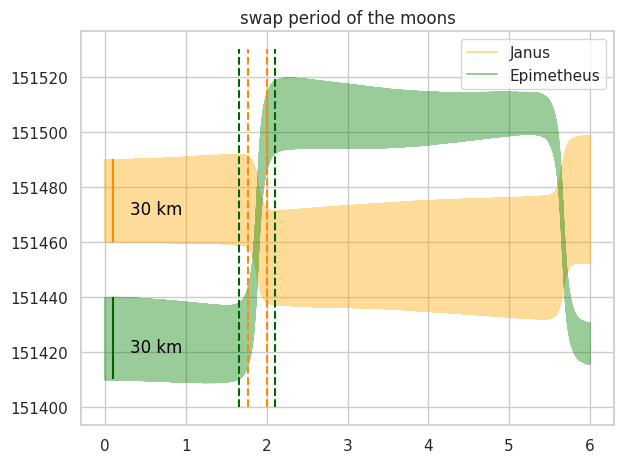

: 

In [ ]:
fig = plt.figure()
plt.title('swap period of the moons')
plt.plot(Physical_time, Physical_OrbRadius[:, 1], alpha=0.4, c='orange', label='Janus')
plt.plot(Physical_time, Physical_OrbRadius[:, 2], c='green', alpha=0.4, label='Epimetheus')
plt.vlines(1.65 ,151400, 151530, linestyle='--', color='darkgreen')
plt.vlines(2.1 ,151400, 151530, linestyle='--', color='darkgreen')
plt.vlines(1.77 ,151400, 151530, linestyle='--', color='darkorange')
plt.vlines(2.0 ,151400, 151530, linestyle='--', color='darkorange')
plt.vlines(0.1, 151410, 151440, linestyle='-', color='darkgreen')
plt.text(0.3, 151420, '30 km', fontsize=12, color='black')
plt.vlines(0.1, 151460, 151490, linestyle='-', color='darkorange')
plt.text(0.3, 151470, '30 km', fontsize=12, color='black')
plt.legend(loc='upper right')
plt.tight_layout()
fig.savefig('outputs/sof6_6e5__steps1e6/swap_period.png')

swap_period_max = 2.1 - 1.65
swap_period_min = 2.0 - 1.77
print(f'Orbital swap period in year: {swap_period_max:.4f} yr')
print(f'Orbital swap period in days: {swap_period_max*365.25:.4f} days')
print(f'Orbital swap period in year: {swap_period_min:.4f} yr')
print(f'Orbital swap period in days: {swap_period_min*365.25:.4f} days')

## Second half of simulation

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from modules.moons import Moons
from modules.Saturn_Nbody_units import Nbody_units

sns.set(style="whitegrid")

Physical_orbit = np.load('outputs/sof6_6e5__steps1e6/positions.npy')
Physical_vel = np.load('outputs/sof6_6e5__steps1e6/velocity.npy')

In [8]:
# First we set the Nbody unit class in Saturn scale:
nu = Nbody_units()

# Set the initial conditions
pos_Saturn = np.array([0., 0., 0.])
pos_Janus = nu.pos_to_Nbody(Physical_orbit[-1,1,:])
pos_Epimetheus = nu.pos_to_Nbody(Physical_orbit[-1,2,:])

vel_Saturn = np.array([0., 0., 0.])
vel_Janus = nu.pos_to_Nbody(Physical_vel[-1,1,:])
vel_Epimetheus = nu.pos_to_Nbody(Physical_vel[-1,2,:])

mass = np.array([1, m_Janus, m_Epimetheus]).reshape(-1)      # Saturn, Janus, Epimetheus

position = np.array([pos_Saturn, pos_Janus, pos_Epimetheus])

velocity = np.array([vel_Saturn, vel_Janus, vel_Epimetheus])

print('N-body units:')
print('mass:', mass)
print('position:', position)
print('velocity:', velocity)

# convert the initial conditions to physical units to check the values
Physical_mass = nu.m_to_Kg(mass)
Physical_position = nu.pos_to_km(position)
Physical_velocity = nu.vel_to_physical(velocity)

print('Physical units in Nbody units:')
print('mass in kg:', Physical_mass)
print('position in km:', Physical_position)
print('velocity in km/s:', Physical_velocity)


# create the moons object
System2 = Moons(position=position, velocity=velocity, mass=mass)

N-body units:
mass: [1.00000000e+00 3.48407531e-09 9.67798698e-10]
position: [[ 0.          0.          0.        ]
 [-0.94037024  0.34154279  0.        ]
 [-0.97968195 -0.20119159  0.        ]]
velocity: [[  0.           0.           0.        ]
 [ -5.39950592 -14.87321313   0.        ]
 [  3.18312244 -15.50187726   0.        ]]
Physical units in Nbody units:
mass in kg: [5.683e+26 1.980e+18 5.500e+17]
position in km: [[      0.               0.               0.        ]
 [-142381.45790208   51712.99324817       0.        ]
 [-148333.64456301  -30462.41880341       0.        ]]
velocity in km/s: [[   0.            0.            0.        ]
 [ -85.4610908  -235.4069126     0.        ]
 [  50.38111256 -245.35714193    0.        ]]


In [9]:
# do the same integration
# define the time of simulation and the number of steps

t0 = 0.0                            # initial time [yr]
tf = 6.0                            # final time [yr]
tsimulation = nu.t_to_Nbody(tf)     # time of simulationin years
print('Time of simulation in Nbody units: ',tsimulation)
print('Time of simulation in days: ',nu.t_to_days(tsimulation))
N = int(1e6)                        # number of steps
h = (tsimulation - t0)/N            # time steps
print('Time step in Nbody units: ',h)
print('Time step in days: ',nu.t_to_days(h))
softening = 6.6e-5

System2_test = System2.copy()

Time of simulation in Nbody units:  19779.609259822613
Time of simulation in days:  2191.4999999999995
Time step in Nbody units:  0.019779609259822615
Time step in days:  0.0021915


In [11]:
import os
# integrate the system using the leapfrog method

if not os.path.exists('outputs/sof6_6e5__steps1e6_secondhalf'):

    System2_orbit, System2_vel, System2_time, System2_OrbRadius, System2_separation = integration_leapfrog(system=System2_test, h=h, 
                                                                                            tsimulation=tsimulation, t=t0, soft=softening)

    print(System2_orbit.shape)

    # Transform into physical quantities
    Physical_orbit2 = nu.pos_to_physical(System2_orbit)
    Physical_OrbRadius2 = nu.pos_to_km(System2_OrbRadius)
    Physical_vel2 = nu.vel_to_physical(System2_vel)
    Physical_time2 = nu.t_to_yr(System2_time)+6.0

    # saving the results
    os.makedirs('outputs/sof6_6e5__steps1e6_secondhalf')
    
    np.save('outputs/sof6_6e5__steps1e6_secondhalf/positions.npy', Physical_orbit2)
    np.save('outputs/sof6_6e5__steps1e6_secondhalf/velocity.npy', Physical_vel2)
    np.save('outputs/sof6_6e5__steps1e6_secondhalf/time.npy', Physical_time2)
    np.save('outputs/sof6_6e5__steps1e6_secondhalf/orbital_radius.npy', Physical_OrbRadius2)
    np.save('outputs/sof6_6e5__steps1e6_secondhalf/separation.npy', System2_separation)

else:
    Physical_orbit2 = np.load('outputs/sof6_6e5__steps1e6_secondhalf/positions.npy')
    Physical_vel2 = np.load('outputs/sof6_6e5__steps1e6_secondhalf/velocity.npy')
    Physical_time2 = np.load('outputs/sof6_6e5__steps1e6_secondhalf/time.npy')
    Physical_OrbRadius2 = np.load('outputs/sof6_6e5__steps1e6_secondhalf/orbital_radius.npy')
    System_separation2 = np.load('outputs/sof6_6e5__steps1e6_secondhalf/separation.npy')

Integrating...
Integration finished
(999999, 3, 3)


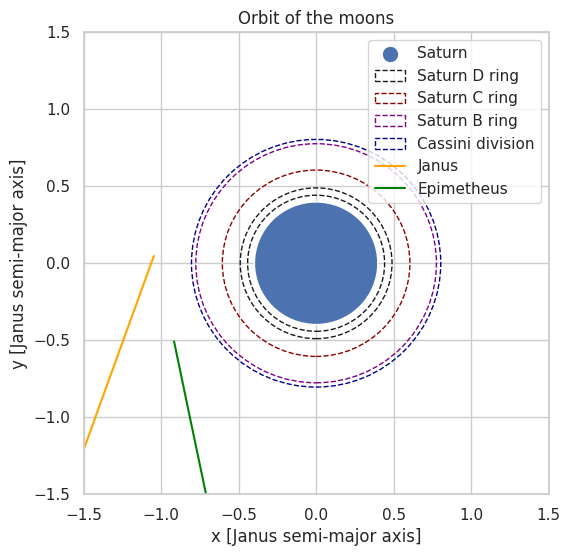

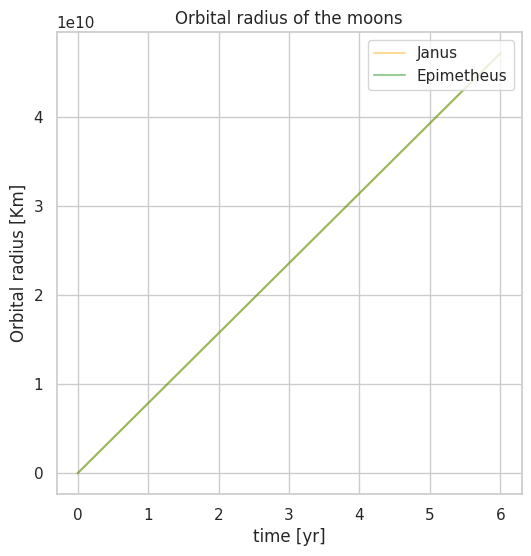

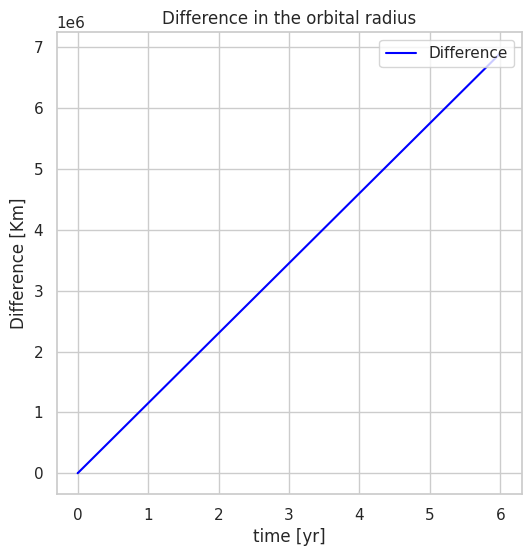

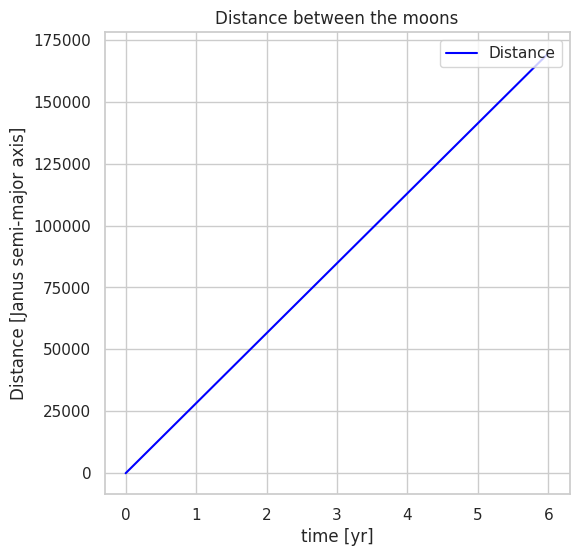

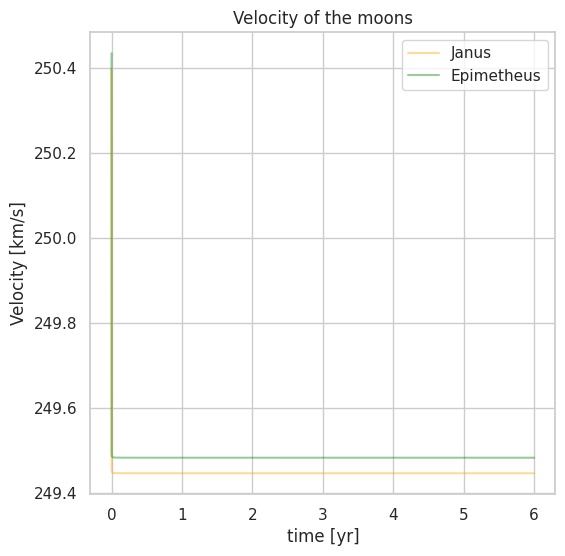

In [13]:
# PLOT THE RESULTS
plt.ion()  # Turn on interactive mode

# 1) Orbit of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
Saturn = Circle((0, 0), 60268/a_scale, fill=True)
ax.scatter(System2_test.pos[0, 0], System2_test.pos[0, 1], s=1e2, label='Saturn')
ring1 = Circle((0, 0), 66897/a_scale, fill=False, color='k', linestyle='--')
ring2 = Circle((0, 0), 74130/a_scale, fill=False, color='k', linestyle='--')
ring3 = Circle((0, 0), 91607/a_scale, fill=False, color='darkred', linestyle='--')
ring4 = Circle((0, 0), 117523/a_scale, fill=False, color='purple', linestyle='--')
ring5 = Circle((0, 0), 121741/a_scale, fill=False, color='darkblue', linestyle='--')
ring1.set_label('Saturn D ring')
ring3.set_label('Saturn C ring')
ring4.set_label('Saturn B ring')
ring5.set_label('Cassini division')
ax.add_patch(ring1)
ax.add_patch(ring2)
ax.add_patch(ring3)
ax.add_patch(ring4)
ax.add_patch(ring5)
ax.add_patch(Saturn)
ax.plot(Physical_orbit2[:, 1, 0], Physical_orbit2[:, 1, 1], c='orange', label='Janus')
ax.plot(Physical_orbit2[:, 2, 0], Physical_orbit2[:, 2, 1], c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbit of the moons')
ax.set_xlabel('x [Janus semi-major axis]')
ax.set_ylabel('y [Janus semi-major axis]')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
fig.savefig('outputs/sof6_6e5__steps1e6_secondhalf/Orbit_moons.png')

# 2) Orbital radius of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time2, Physical_OrbRadius2[:, 1], c='orange', alpha=0.4, label='Janus')
ax.plot(Physical_time2, Physical_OrbRadius2[:, 2], c='green', alpha=0.4, label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbital radius of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Orbital radius [Km]')
fig.savefig('outputs/sof6_6e5__steps1e6_secondhalf/Orbital_radius_moons.png')

# 3) difference in the orbital radius:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time2, np.abs(Physical_OrbRadius2[:, 1] - Physical_OrbRadius2[:, 2]), c='blue', label='Difference')
ax.legend(loc='upper right')
ax.set_title('Difference in the orbital radius')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Difference [Km]')
fig.savefig('outputs/sof6_6e5__steps1e6_secondhalf/Difference_orbital_radius.png')

# 4) Distance between the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time2, System2_separation, c='blue', label='Distance')
ax.legend(loc='upper right')
ax.set_title('Distance between the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Distance [Janus semi-major axis]')
fig.savefig('outputs/sof6_6e5__steps1e6_secondhalf/Distance_moons.png')

# 5) Velocity of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time2, np.linalg.norm(Physical_vel2[:, 1, :], axis=-1), alpha=0.4, c='orange', label='Janus')
ax.plot(Physical_time2, np.linalg.norm(Physical_vel2[:, 2, :], axis=-1), alpha=0.4, c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Velocity of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Velocity [km/s]')
fig.savefig('outputs/sof6_6e5__steps1e6_secondhalf/Velocity_moons.png')